In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Creating sample data

In [126]:
df = pd.DataFrame({
    "years": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "sales": [2000, 2250, 2800, 2850, 3542, 3707, 5556, 8544, 8555, 9100, 12000],
    "budget": [5155, 4892, 5300, 5800, 4500, 6000, 5700, 6200, 3200, 7000, 8000],
    "employee": [255, 244, 276, 280, 290, 244, 255, 277, 291, 300, 322]
})

df.head(2)

,years,sales,budget,employee
0,2010,2000,5155,255
1,2011,2250,4892,244


# Creating some generic helper functions

In [127]:
def prepare(*args):
    x = df[[a for a in args]].copy()
        
    return np.array(x).reshape(-1, len(args))

def prediction(lower_bound, upper_bound):
    y = [num for num in range(lower_bound, upper_bound+1)]
    
    return np.array(y).reshape(-1, 1)

# Linear Regression

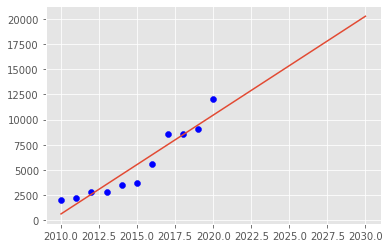

In [5]:
# Preparing Data
x = prepare("years")
y = prepare("sales")

predict = prediction(2010, 2030)

# Creating model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

# Plotting the model with predictions
plt.scatter(x, y, color = "blue")
plt.plot(Prediction, lr.predict(Prediction));

# Multiple Linear Regression

In [95]:
# Preparing Data
x = prepare("budget", "years")
y = prepare("sales")

# Creating model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

# Using the model (no plot this time)
for x_values, y_values in zip(x, y):
    x_values = np.array(x_values).reshape(-1, 2)
    prediction = lr.predict(x_values)[0][0]

    print(f"Prediction: {int(prediction)} - Real: {y_values[0]}")

Prediction: 702 - Real: 2000
Prediction: 1595 - Real: 2250
Prediction: 2628 - Real: 2800
Prediction: 3679 - Real: 2850
Prediction: 4359 - Real: 3542
Prediction: 5616 - Real: 3707
Prediction: 6502 - Real: 5556
Prediction: 7553 - Real: 8544
Prediction: 7883 - Real: 8555
Prediction: 9614 - Real: 9100
Prediction: 10768 - Real: 12000


# Polynomial Regression

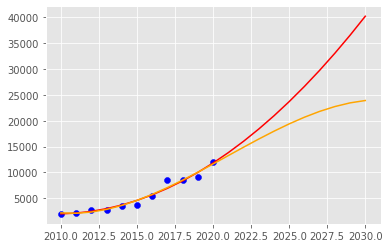

In [160]:
# Preparing Data
x = prepare("years")
y  = prepare("sales")

predict = prediction(2010, 2030)

# We create two models with different degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
    
poly2 = PolynomialFeatures(degree = 2)
lr2 = LinearRegression().fit(poly2.fit_transform(x), y)

poly3 = PolynomialFeatures(degree = 3)
lr3 = LinearRegression().fit(poly3.fit_transform(x), y)

# Plotting the model with predictions
plt.scatter(x, y, color = "blue")
plt.plot(predict, lr2.predict(poly2.fit_transform(predict)), color = "red")
plt.plot(predict, lr3.predict(poly3.fit_transform(predict)), color = "orange");

# Decision Tree Regression

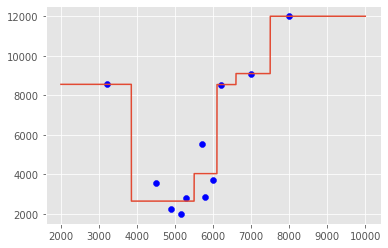

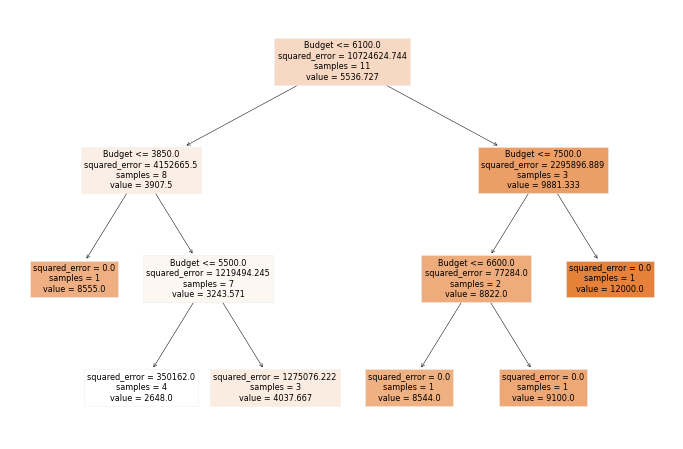

In [199]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Preparing Data
x = prepare("budget")
y = prepare("sales")

predict = prediction(2000, 10000)

# Creating model
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 3)
regressor.fit(x, y)

# Plotting the model as Diagram
plt.scatter(x, y, color = "blue")
plt.plot(predict, regressor.predict(predict))
fig.show()

# PLotting as Tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(regressor, ax = ax, feature_names = ["Budget"], filled = True);

# Random Forest Regression
Random Forest and Decision Trees are very similiar. A random Forest is basically a collection of multiple Decision Trees which can be seperated by bootstrapping (ie splitting training data and/or different features in multiple trees). It comes with small disadvantages (slower, more complex and harder to visualize), but it will be more accurate and will avoid overfitting a single deicision tree because you can split features. Since we have a very simple dataset here with only 1 independent variable, we won't see any difference in the result but i still wanted to show how to apply the model in theory (without any arguments tho).

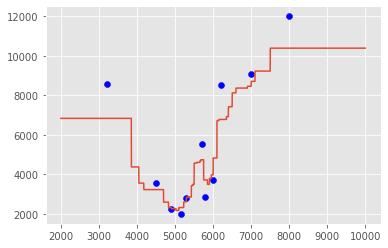

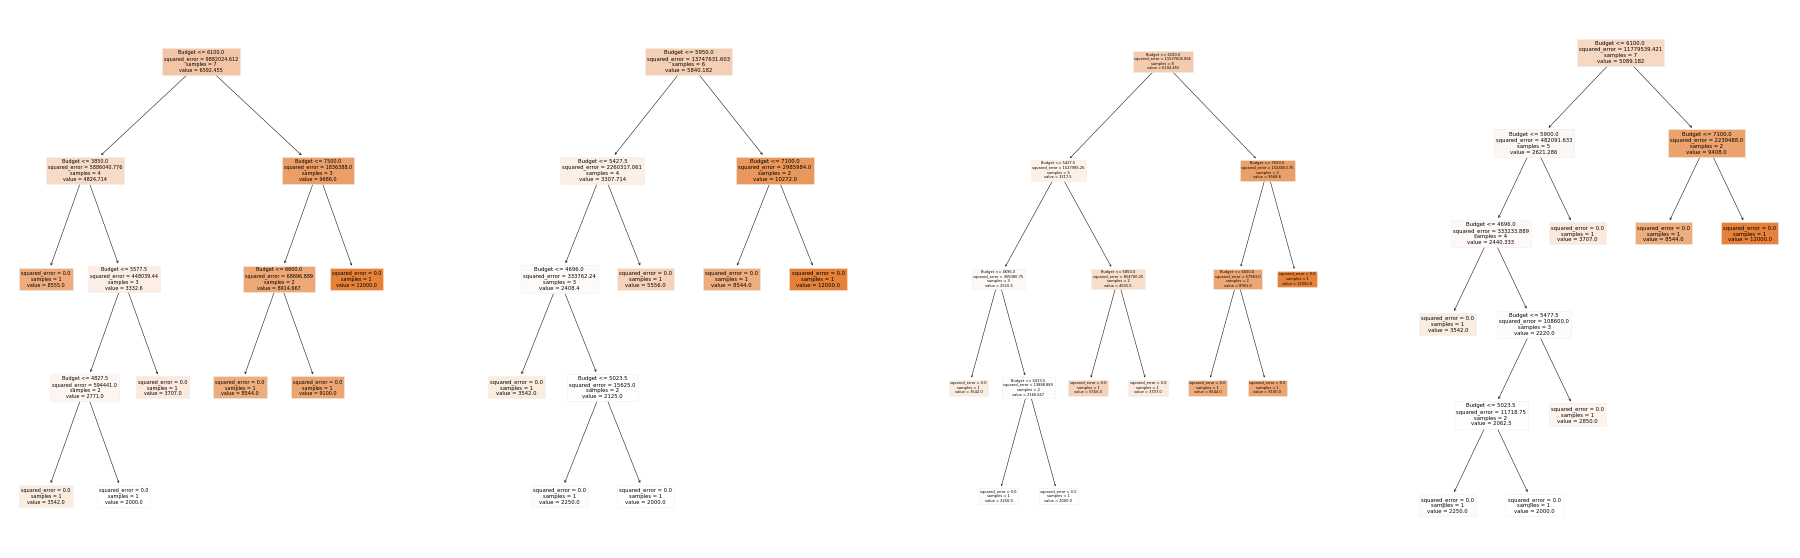

In [226]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# Preparing Data
x = prepare("budget")
y = prepare("sales")

predict = prediction(2000, 10000)

# Creating Model
regressor = RandomForestRegressor()
regressor.fit(x, y)

# Plotting the model as Diagram
plt.scatter(x, y, color = "blue")
plt.plot(predict, regressor.predict(predict))
fig.show()

# PLotting the trees
fig, ax = plt.subplots(1, 4, figsize = (32,10))

for index in range(0, 4):
    tree.plot_tree(regressor.estimators_[index], ax = ax[index], feature_names = ["Budget"], filled = True)